# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

# Table of Contents

1. [Cleaning and EDA](#eda)
2. [Data Dictionary](#datadict)
3. [Regression](#reggresion)  
    1 [StatsModel Logistic Regression](#statsmodels logreg)  
    2 [Category Logistic Regression](#categorylr)

## 1. Load in the dataset

This is the only part completed for you.

---

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [23]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')
su.shape

(7395, 27)

## 2. Clean up/examine your data
<a id="eda"></a>

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [24]:
su.head(10)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,...,?,0,12,?,4368,55,3,0.054545,0.087356,0
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.22111,0.773810,0.215054,0.053763,0.043011,0.043011,...,1,0,21,0,1287,93,3,0.548387,0.064327,1
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,?,1.883333,0.719697,0.265152,0.113636,0.015152,...,?,0,5,?,27656,132,4,0.068182,0.148551,0
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,?,0.471503,0.190722,0.036082,0.000000,0.000000,...,1,0,17,0,2471,194,7,0.644330,0.125000,1
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,?,2.410112,0.469325,0.101227,0.018405,0.003067,...,?,1,14,?,11459,326,4,0.236196,0.094412,1


In [26]:
su['alchemy_category'] = su['alchemy_category'].apply(lambda x: np.NaN if x == '?' else x)
su.dropna(axis=0, how='any', inplace=True)
su['alchemy_category_score'] = pd.to_numeric(su['alchemy_category_score'])
su.shape

(5053, 27)

## Data Dictionary
<a id="datadict"></a>

|Column Name|Description|Variable Type|
|---|---|--|
|url|URL of the recommended website|Categorical|
|urlid|Unique StumbleUpon ID assigned to the URL|Ordinal|
|boilerplate|JSON file containing the text of the title and the text of the body|Categorical|
|alchemy_category|Category of the website assigned through AlchemyAPI|Categorical|
|alchemy_category_score|Score from 1(best) to 0(worst) of the confidence of the AlchemyAPI in assigning the category|Interval|
|avglinksize|Mean number of words that appear in all the links present on the wepsite|Cardinal|
|commonLinkRatio_(1-4)| The number of links sharing at least one word in common with x other links divided by total number of links|Interval|
|compression_ratio|Ratio of compressed size of website to uncompressed size (using gzip)|Interval|
|embed_ratio| Ratio of how many times HTML embed element appears relative to other elements|Interval|
|frameBased|Whether or not a website is using a frameset markup(1) or a body(0)|Categorical|
|frameTagRatio|Ratio of frames to markup|Interval|
|hasDomainLink|Whether(1) or not(0) the website has a link to a domain|Categorical|
|html_ratio|How many tags are present to total text span on the website|Interval|
|image_ratio|Ratio of <img> tags to total text span on the website|Interval|
|is_news|Whether(1) or not(0) the website is categorized as news|Categorical|
|lengthyLinkDomain|Whether(1) or not(0) at least three links contain >30 characters|Categorical|
|linkwordscore|Ratio of words on page to the hyperlink text|Interval|
|news_front_page|Whether(1) or not(0) the news is considered significant 'front page'|Categorical|
|non_markup_alphanum_characters|Total number of characters in the text of the website|Ordinal|
|numberOfLinks|Count of how many links are present|Ordinal
|numwords_in_url|Count of words in the URL|Ordinal|
|parametrizedLinkRatio|Ratio of links with an event on the click or additonal parameter to all other links|Interval|
|spelling_errors_ratio|Ratio of words classified as misspelled to all text present|Interval|
|label| **TARGET** Whether(1) or not(0) the website is considered 'evergreen'|Categorical|

* What makes evergreen news stories? Are there any?
* Does AlchemyAPI score play into whether it is evergreen?
* Is FrameSet or Body more likely to be evergreen?
* Are there evergreen front page news stories? What text do they contain?

In [27]:
su.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 0 to 7393
Data columns (total 27 columns):
url                               5053 non-null object
urlid                             5053 non-null int64
boilerplate                       5053 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       5053 non-null float64
commonlinkratio_1                 5053 non-null float64
commonlinkratio_2                 5053 non-null float64
commonlinkratio_3                 5053 non-null float64
commonlinkratio_4                 5053 non-null float64
compression_ratio                 5053 non-null float64
embed_ratio                       5053 non-null float64
framebased                        5053 non-null int64
frameTagRatio                     5053 non-null float64
hasDomainLink                     5053 non-null int64
html_ratio                        5053 non-null float64
image_

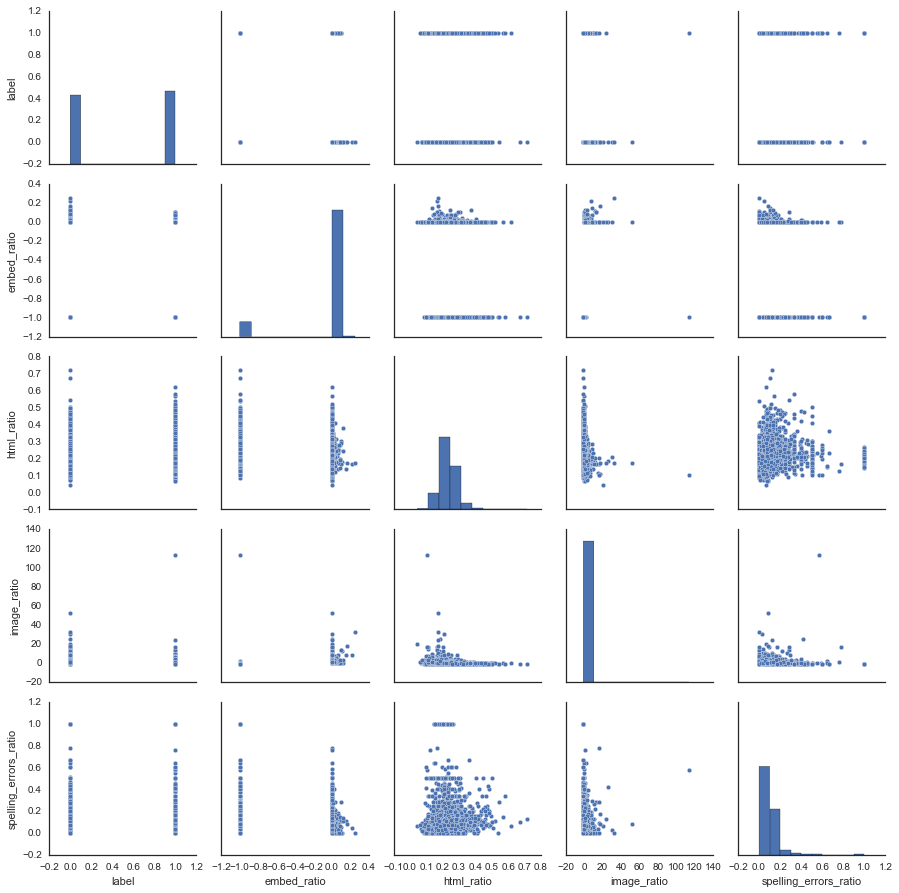

In [20]:
sns.pairplot(su[['label','alchemy_category_score',
   'embed_ratio', 'html_ratio', 'image_ratio', 'spelling_errors_ratio']])

*Through looking at the description of the variables present, certain items related to the URL are likely not important to the regression at hand. Because of the nature of stumbleupon, the URL itself and associated identifiers are likely not that important*
*Additional issue is that there are certain values that are negative in the dataframe. Using a describe can determine which sections have negative values*

In [28]:
su.describe()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.0,...,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000
mean,5312.022759,0.603334,2.941459,0.463598,0.213599,0.091537,0.049556,1.380019,-0.060236,0.0,...,0.234625,0.292137,0.672670,30.067485,5438.513556,178.760538,5.056006,0.171011,0.097238,0.518504
std,3061.655693,0.212864,10.136599,0.198788,0.144082,0.093382,0.071398,4.116340,0.239526,0.0,...,0.051518,1.972679,0.469285,20.099013,7027.581558,154.565086,3.267839,0.176406,0.060423,0.499707
min,5.000000,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,...,0.070094,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2658.000000,0.452424,1.620690,0.343434,0.108108,0.022989,0.000000,0.440870,0.000000,0.0,...,0.202473,0.032358,0.000000,14.000000,1601.000000,82.000000,3.000000,0.044025,0.069565,0.000000
50%,5307.000000,0.625616,2.107692,0.476190,0.202312,0.069444,0.024453,0.479335,0.000000,0.0,...,0.230635,0.088136,1.000000,26.000000,3623.000000,141.000000,5.000000,0.116505,0.089094,1.000000
75%,7983.000000,0.780851,2.682927,0.607029,0.296552,0.132743,0.066667,0.547486,0.000000,0.0,...,0.260788,0.240000,1.000000,43.000000,6413.000000,228.000000,7.000000,0.237726,0.110577,1.000000
max,10566.000000,0.999426,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.214286,0.0,...,0.716883,113.333333,1.000000,100.000000,87948.000000,3283.000000,21.000000,1.000000,1.000000,1.000000


In [83]:
len(su[su['image_ratio']==0])


29

*Certain ratios have values of -1 which is not possible. These values will be replaced by the average of their associated*

In [ ]:
# Get list of all categories

# isolate each category
# take mean of each category 
# ignore -1 values

# 

## 3. Use statsmodels' logistic regression function to look at variable significance
<a id="statsmodels logreg"></a>

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [35]:
# Import appropriate pacakges
import statsmodels.formula.api as smf
import patsy

In [36]:
# Create Formula
formula = 'label ~ html_ratio + image_ratio + embed_ratio + frameTagRatio +parametrizedLinkRatio + spelling_errors_ratio + numberOfLinks - 1' # -1 used to remove the intercept

In [37]:
logr = smf.logit(formula, data=su) # Perform Logit function on provided formula

In [38]:
logr_result = logr.fit()           # Fit the model

Optimization terminated successfully.
         Current function value: 0.668883
         Iterations 5


In [39]:
print logr_result.summary()       # Print out the summary results from the regression

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5046
Method:                           MLE   Df Model:                            6
Date:                Thu, 12 May 2016   Pseudo R-squ.:                 0.03405
Time:                        14:37:40   Log-Likelihood:                -3379.9
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 1.302e-48
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
html_ratio                3.3156      0.337      9.829      0.000         2.654     3.977
image_ratio              -0.0111      0.018     -0.609      0.543        -0.047     0.025
embed_ra

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [96]:
formula = '''label ~ alchemy_category_score + avglinksize + compression_ratio + 
            embed_ratio + frameTagRatio + html_ratio + image_ratio
            + avglinksize+ commonlinkratio_1+commonlinkratio_2+
            commonlinkratio_3 + commonlinkratio_4'''


In [97]:
logreg = smf.logit(formula, data=su)

In [98]:
model = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.664055
         Iterations 5


In [99]:
print model.summary()

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5041
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 May 2016   Pseudo R-squ.:                 0.04102
Time:                        16:19:31   Log-Likelihood:                -3355.5
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 4.581e-55
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.9733      0.191      5.101      0.000         0.599     1.347
alchemy_category_score    -0.8397      0.140     -5.995      0.000        -1.114    -0.565
avgl

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [70]:
formula = '''label ~ C(alchemy_category) + alchemy_category_score + avglinksize + 
compression_ratio + embed_ratio + 
frameTagRatio + html_ratio + image_ratio - 1'''

In [73]:
logreg = smf.logit(formula, data=su)
model = logreg.fit()

         Current function value: 0.610383
         Iterations: 35


/Users/sebozek/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [74]:
print model.summary()

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5033
Method:                           MLE   Df Model:                           19
Date:                Thu, 12 May 2016   Pseudo R-squ.:                  0.1185
Time:                        16:02:48   Log-Likelihood:                -3084.3
converged:                      False   LL-Null:                       -3499.0
                                        LLR p-value:                1.151e-163
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     0.0759      0.190      0.400      0.689        -0.296     0.448
C(alchemy_category)[business]               

## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [118]:
from sklearn.linear_model import LogisticRegressionCV


not_target = [x for x in su if x not in ['label', 'is_news', 'url',
                                         'urlid','boilerplate',
                                        'alchemy_category', 
                                         'news_front_page', 'title']]
su_n = su.copy()
su_n.ix[:, not_target] = (su_n.ix[:, not_target] - su_n.ix[:, not_target].mean()) / su_n.ix[:, not_target].std()

In [142]:
logreg = LogisticRegressionCV(Cs=10, cv=7)

In [143]:
Y, X = patsy.dmatrices('''label ~ C(alchemy_category) + alchemy_category_score + avglinksize + 
compression_ratio + embed_ratio + 
frameTagRatio + html_ratio + image_ratio - 1''', data=su_n)

Y = np.ravel(Y) # Change Y to 1D array

logreg.fit(X,Y) # fit to the logistic 

LogisticRegressionCV(Cs=10, class_weight=None, cv=7, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [159]:
logreg.scores_[1]

array([[ 0.55048409,  0.61549101,  0.64868603,  0.64868603,  0.65006916,
         0.65006916,  0.65145228,  0.65145228,  0.65145228,  0.65145228],
       [ 0.54495159,  0.64315353,  0.6846473 ,  0.69432918,  0.69156293,
         0.69017981,  0.69017981,  0.69017981,  0.69017981,  0.69017981],
       [ 0.5401662 ,  0.62603878,  0.68282548,  0.66204986,  0.65927978,
         0.66066482,  0.65927978,  0.65927978,  0.65927978,  0.65927978],
       [ 0.55124654,  0.61634349,  0.67451524,  0.67036011,  0.66481994,
         0.66620499,  0.66620499,  0.66620499,  0.66620499,  0.66620499],
       [ 0.56171983,  0.63106796,  0.68377254,  0.67128988,  0.67267684,
         0.67267684,  0.67267684,  0.67128988,  0.67128988,  0.67128988],
       [ 0.55755895,  0.63384189,  0.66158114,  0.67545076,  0.67961165,
         0.67822469,  0.67822469,  0.67822469,  0.67822469,  0.67822469],
       [ 0.55478502,  0.63522885,  0.64216366,  0.6629681 ,  0.66574202,
         0.66712899,  0.66712899,  0.66712899

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [161]:
from sklearn.grid_search import GridSearchCV

range_c = np.logspace(0,5,20) # Create logspace

lr = LogisticRegression()

logreg_grid = GridSearchCV(
estimator=logreg,
param_grid=dict(C=range_c), n_jobs =1)

logreg_grid.fit(X,Y).score(X,Y)

ValueError: Invalid parameter C for estimator LogisticRegressionCV. Check the list of available parameters with `estimator.get_params().keys()`.

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

In [15]:
su['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

<a id="categorylr"></a>
*One category that would be interesting to predict would be the culture_politics. This is since the category is rather small, but also has overlap with many of the other possible categories, making it slightly tricker to predict.*

In [38]:
su['is_culture'] = su['alchemy_category'].apply(lambda x: 1 if x == 'culture_politics' else 0)

In [46]:
print "Culture and politics ratio is: ", float(len(su[su['is_culture']==1])) / len(su)

Culture and politics ratio is:  0.0678804670493


### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

### 7.3 Normalize the predictor matrix columns

---

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [49]:
import json

# Select titles from the boilerplate
su['title'] = su.boilerplate.map(lambda x: json.loads(x).get('title', ''))

titles = su['title'].fillna('') # fill in blank strings

# print off first few strings
titles[0:3]

0    IBM Sees Holographic Calls Air Breathing Batte...
1    The Fully Electronic Futuristic Starting Gun T...
2    Fruits that Fight the Flu fruits that fight th...
Name: title, dtype: object

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Since titles are concise, want to look at the distribution of the 750 words



vectorizer = CountVectorizer(max_features=750,    # Feature Word Size of 750
                            ngram_range=(1,2),    # Set an n-gram of 2
                            stop_words='english', # Remove stop words
                            binary=True)          # Look to see whether or not the word is present

In [51]:
vectorizer.fit(titles)

CountVectorizer(analyzer=u'word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=750, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [54]:
title_x = vectorizer.transform(titles)
title_x.todense() # Creates matrix of each title and whether or not one of the 750 most popular words appear

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

model = LogisticRegression()
Y = su['label']

title_scores = cross_val_score(model, title_x, Y, cv=10)
print title_scores

model.fit(title_x, Y)

coefs = model.coef_
words = vectorizer.get_feature_names()

[ 0.78458498  0.743083    0.73715415  0.7960396   0.73861386  0.77821782
  0.75841584  0.78811881  0.79009901  0.76237624]


In [68]:
for word, coef in zip(words, coefs[0])[100:120]:
    print word, coef

bread recipe -0.342968278819
break 0.269281619084
break com -0.20545839053
breakfast 0.645066276076
breaking -0.466565888306
breaking news -0.124356158199
broccoli 0.762117606117
brown 0.468058338191
brownie 1.10926137376
brownies 0.978112047957
buffalo -0.00433418683425
burger 0.705755111643
burgers 0.29854442773
burn -0.0115061055188
business -0.232321427516
butter 1.64020417522
buttercream 0.768022119394
buy -0.370981460175
cajun 0.281989263339
cake 1.79850775627


### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---